**Daily attendance of bike tracks**

*every row contains the number of bicycles on every track of the city(montreal), 
for every day of the year*

url = "https://raw.githubusercontent.com/ndas1971/Misc/master/bikes.csv"

1. Read 
2. Check head 
3. Check summary statistics 
4. plot the daily attendance of two tracks, 'Berri1', 'PierDup'
5. Check index , explore weekday attributes 
6. Get sum of all attendance as a function of the weekday
7. Display this in figure , what is the inference?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/ndas1971/Misc/master/bikes.csv"
df = pd.read_csv(url, index_col='Date', parse_dates=True, dayfirst=True)

(0.0, 153153.0)

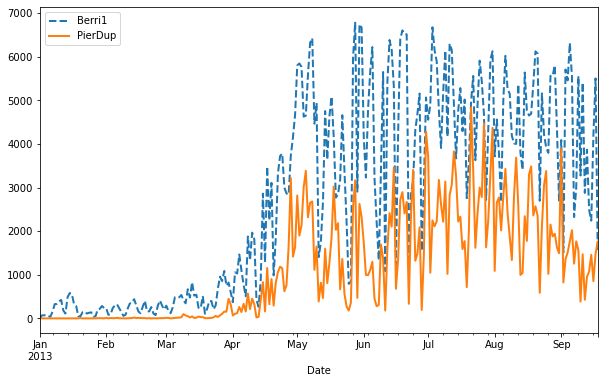

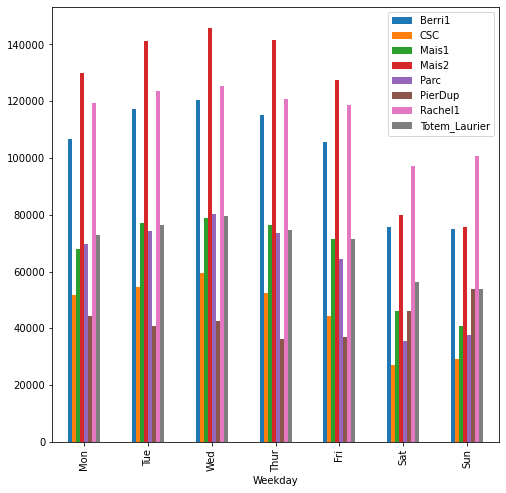

In [13]:
#2
df.head()

#3
df.describe()

#4
df[ ['Berri1', 'PierDup']].plot(figsize=(10,6), style=['--','-'], lw=2)

df.index.weekday #Monday=0, Sunday=6

#5,6
df_week = df.groupby(df.index.weekday).sum()
df_week.head()

fig,ax = plt.subplots(1,1, figsize=(8,8))
df_week.plot(kind='bar', style='-o', lw=3, ax=ax)
ax.set_xlabel("Weekday")
ax.set_xticklabels('Mon,Tue,Wed,Thur,Fri,Sat,Sun'.split(","))
ax.set_ylim(0)

[Text(0, 0, 'Mon'),
 Text(1, 0, 'Tue'),
 Text(2, 0, 'Wed'),
 Text(3, 0, 'Thur'),
 Text(4, 0, 'Fri'),
 Text(5, 0, 'Sat'),
 Text(6, 0, 'Sun')]

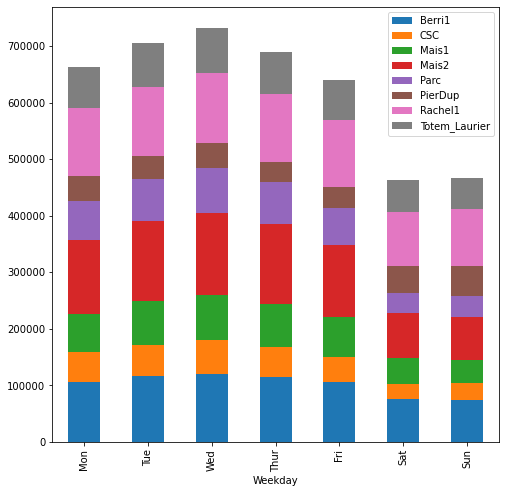

In [15]:
#display all tracks together (stacked or area plot)?
fig,ax = plt.subplots(1,1, figsize=(8,8))
df_week.plot.bar(stacked=True, ax=ax)
ax.set_xlabel("Weekday")
ax.set_xticklabels('Mon,Tue,Wed,Thur,Fri,Sat,Sun'.split(","))

B. **Titanic-https://www.kaggle.com/c/titanic/data** 

*Database of whether somebody survived or not*

1. Load the data
2. Which gender survived more 
3. Does it depend on pclass?
4. can we see % of survival of each gender and pclass 
What is your inference? 

In [16]:
path = 'data/titanic_train.csv'
tt = pd.read_csv(path)

In [18]:
tt.head()
tt.groupby('sex')['survived'].value_counts()

tt.pclass.unique()
tt.groupby(['pclass', 'sex']).survived.value_counts()

sex     survived
female  1           233
        0            81
male    0           468
        1           109
Name: survived, dtype: int64

In [25]:
id = pd.crosstab([tt.pclass, tt.sex], tt.survived.astype(float))
id
id.sum(axis=1)

pclass  sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [27]:
id.div(id.sum(axis=1).astype(float),0)

survived            0.0       1.0
pclass sex                       
1      female  0.031915  0.968085
       male    0.631148  0.368852
2      female  0.078947  0.921053
       male    0.842593  0.157407
3      female  0.500000  0.500000
       male    0.864553  0.135447